# PARKINSON'S DISEASE PREDICTION AND EXPLORATORY DATA ANALYSIS

Parkinson's disease (PD) is one of the most common neurodegenerative diseases in the world. It is estimated to affect 930,000 people in the United States by 2020. Neurodegenerative diseasea are a heterogeneous group of disorders that are characterized by the progressive degeneration of the structure and function of the nervous system. They are incurable and debilitating conditions that cause problems with mental functioning also called dementias.Neurodegenerative diseases affect millions of people worldwide. In addition to PD is Alzheimer’s disease as the most common neurodegenerative diseases. 5.4 million estimated Americans were living with Alzheimer’s disease in 2016.

Idiopathic Parkinson’s disease (IPD) is known as a chronic neurodegenerative disorder that may lead to producing dysphonic voice due to probable neurogenic interruptions in the laryngeal nerve paths. It is also a progressive movement disorder resulting from the loss of nerve cells in the brain that produce a substance called dopamine.

### THE DATASET USED

The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. It consists of 195 rows and 24 columns. Each column represent particular voice measure of an individual with first column been the name.

#### LOAD DATA

In [1]:
#import the needed packages
import pandas as pd  # Data analysis, manipulation and wrangling
import seaborn as sns # For statistical visualization
import matplotlib.pyplot as plt # For displaying the visualization to screen
import numpy as np # For performing mathematical operations
from scipy.stats import pearsonr # Compute the pearson correlation between variables

#Set the global style for all diagrams
sns.set(style="ticks")

#Load the dataset into pandas DataFrame
pd_data = pd.read_csv("parkinsons.data")

In [2]:
#Explore the data by looking at the first five rows
display(pd_data.head())

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
#Check the dimension of the DataFrame (i.e. rows and columns)
print(pd_data.shape)

#Check the columns of the DataFrame
print(pd_data.columns)

(195, 24)
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


#### FEATURES/ATTRIBUTES (COLUMNS) DESCRIPTION

The attributes and their description as used in the DataFrame are as follows:
1. MDVP:Fo(Hz)       -  Average vocal fundamental frequency
2. MDVP:Fhi(Hz)      -  Maximum vocal fundamental frequency
3. MDVP:Flo(Hz)      -  Minimum vocal fundamental frequency
4. MDVP:Jitter(%)    -  MDVP jitter in percentage
5. MDVP:Jitter(Abs)  -  MDVP absolute jitter in ms
6. MDVP:RAP          -  MDVP relative amplitude perturbation
7. MDVP:PPQ          -  MDVP five-point period perturbation quotient
8. Jitter:DDP        -  Average absolute difference of differences between jitter cycles
9. MDVP:Shimmer      -  MDVP local shimmer
10. MDVP:Shimmer(dB) -  MDVP local shimmer in dB
11. Shimmer:APQ3     -  Three-point amplitude perturbation quotient
12. Shimmer:APQ5     -  Five-point amplitude perturbation quotient
13. MDVP:APQ11       -  MDVP 11-point amplitude perturbation quotient
14. Shimmer:DDA      -  Average absolute differences between the amplitudes of consecutive periods
15. NHR              -  Noise-to-harmonics ratio
16. HNR              -  Harmonics-to-noise ratio
17. RPDE             -  Recurrence period density entropy measure
18. D2               -  Correlation dimension
19. DFA              -  Signal fractal scaling exponent of detrended fluctuation analysis
20. Spread1          -  Two nonlinear measures of fundamental
21. Spread2          -  Frequency variation
22. PPE              -  Pitch period entropy
23. Name             -  ASCII subject name and recording number
24. Status           -  Health status of the subject (one (1)) - Parkinson's, (zero (0)) - healthy

#### EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
#Perform summary statistics on the pd_data 
display(pd_data.describe())

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
#Lastly figure out any additional information about the dataset
display(pd_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

None

There is no column without a data observation as shown from the info method of pandas DataFrame. Hence there is no occurences of missing data in the dataset used. Moreover, most of the attributes are of data type float which is beneficial and necessary for the model building. 

#### VISUAL EXPLORATORY ANALYSIS

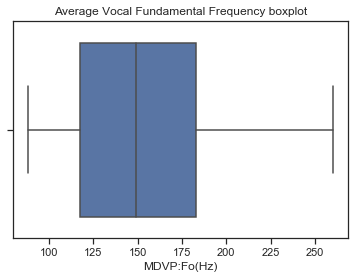

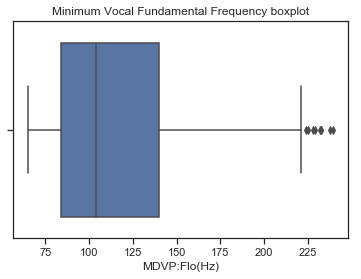

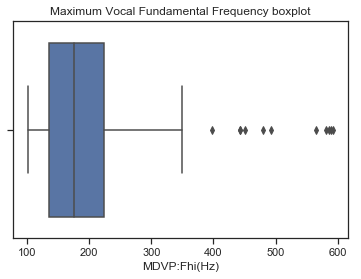

In [6]:
#Visualize data observation for average vocal fundamental frequency
sns.boxplot(x='MDVP:Fo(Hz)', data=pd_data)
plt.title("Average Vocal Fundamental Frequency boxplot")
plt.show()
sns.boxplot(x='MDVP:Flo(Hz)', data=pd_data)
plt.title("Minimum Vocal Fundamental Frequency boxplot")
plt.show()
sns.boxplot(x='MDVP:Fhi(Hz)', data=pd_data)
plt.title("Maximum Vocal Fundamental Frequency boxplot")
plt.show()

From the above visulizations, there are some outliners for the maximum and minimum vocal fundamental frequencies (i.e. MDVP:Fhi(Hz) and MDVP:Flo(Hz)) respectively. This therefore calls for feature rescaling during the pre-processing phase of the model building. 

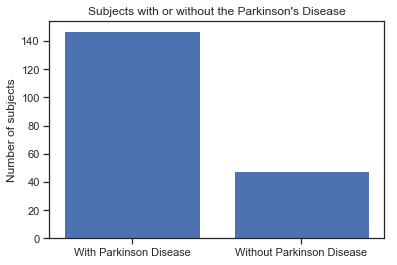

In [7]:
group = pd_data['status'].value_counts()
status=["With Parkinson Disease","Without Parkinson Disease"]
plt.bar(status,group)
plt.ylabel("Number of subjects")
plt.title("Subjects with or without the Parkinson's Disease")
plt.show()

In [8]:
# Subjects with the Parkinson's Disease and those without
with_pd = group[0]
without_pd = group[1]
print("The number of subjects in the dataset without Parkinson's disease is "+ str(with_pd))
print("The number of subjects in the dataset with Parkinson's disease is "+ str(without_pd))

The number of subjects in the dataset without Parkinson's disease is 48
The number of subjects in the dataset with Parkinson's disease is 147


QUESTIONS DRIVING THE ANALYSIS

The following questions drove the analysis of the dataset:
1. Is there any feature that correlates with the target feature?
2. Do features correlates with each other?
3. What is number of features required to approximate the dataset well?
4. What is the most important feature (predictor) for the target variable?

##### 1. Is there any feature that correlates with the target feature?

<function matplotlib.pyplot.show(*args, **kw)>

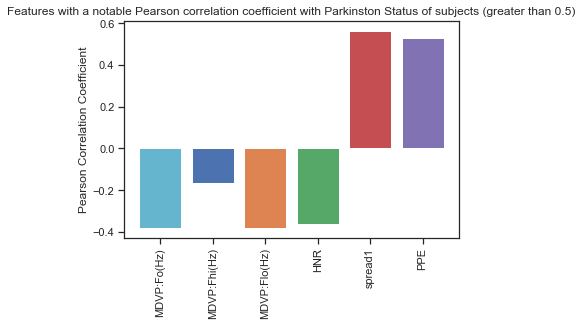

In [9]:
#Make a copy of the dataset
pd_data_2=pd_data.copy()
#Create a dictionary for storing the pearson correlation coefficient between features
corr={}
#Drop two features or attributes from the dataset (i.e. 'status' and 'name') 
features_needed = pd_data_2.drop(['name','status'],axis=1)
for col in features_needed.columns:
    pearsonr_corr,_=pearsonr(pd_data[col],pd_data["status"])
    corr[col] = pearsonr_corr
    for key,values in corr.items():
        if values>0.5:
            plt.bar(key,values)
            plt.title("Features with a notable Pearson correlation coefficient with Parkinston Status of subjects (greater than 0.5)")
        if values<0.0:
            plt.bar(key,values)
            plt.title("Features with a notable Pearson correlation coefficient with Parkinston Status of subjects (greater than 0.5)")
plt.ylabel("Pearson Correlation Coefficient")
plt.xticks(rotation=90)
plt.show

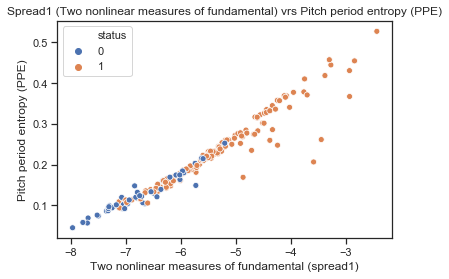

In [10]:
sns.scatterplot(x='spread1',y='PPE',data=pd_data,hue='status')
plt.title("Spread1 (Two nonlinear measures of fundamental) vrs Pitch period entropy (PPE)")
plt.xlabel('Two nonlinear measures of fundamental (spread1)')
plt.ylabel("Pitch period entropy (PPE)")
plt.show()

Using the Pearson Correlation Coefficient, it can be observed that features 'spread1 (Two nonlinear measures of fundamental)' and 'PPE (Pitch period entropy)' have a notable correlation with the target feature (status) with pearson correlation coefficient of 0.56 and 0.53 respectively.Since there is correlation between the target feature and some features. Further analysis is needed to find more about feature correlation.

##### 2. Do features correlates with each other?

In [11]:
features_list=list(features_needed)
pearson_dict={}
for row in features_list:
    for col in features_needed:
        corr_p,_=pearsonr(pd_data[col],pd_data[row])
        corr_p ="{:.3f}".format(corr_p)
        if col!=row:
            pearson_dict[col,row]=corr_p
#print(pearson_dict)
list_of_corr=[]
corr_values=[]
for key,values in pearson_dict.items():
    if values not in corr_values:
        corr_values.append(values)
        if values >'0.9870':
            list_of_corr.append([key[0],key[1]])
print(list_of_corr)


[['MDVP:RAP', 'MDVP:Jitter(%)'], ['Jitter:DDP', 'MDVP:RAP'], ['Shimmer:APQ3', 'MDVP:Shimmer']]


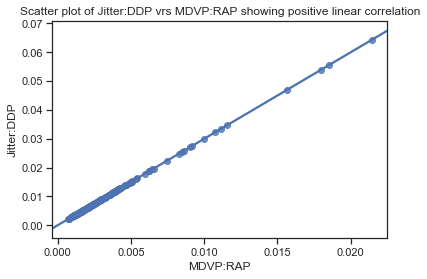

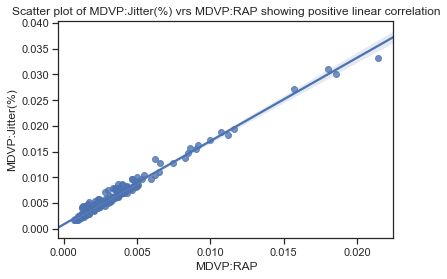

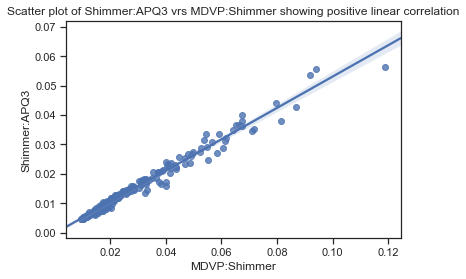

In [12]:
sns.regplot(y='Jitter:DDP',x='MDVP:RAP',data=pd_data)
plt.title("Scatter plot of Jitter:DDP vrs MDVP:RAP showing positive linear correlation")
plt.show()
sns.regplot(y='MDVP:Jitter(%)',x='MDVP:RAP',data=pd_data)
plt.title("Scatter plot of MDVP:Jitter(%) vrs MDVP:RAP showing positive linear correlation")
plt.show()
sns.regplot(y='Shimmer:APQ3',x='MDVP:Shimmer',data=pd_data)
plt.title("Scatter plot of Shimmer:APQ3 vrs MDVP:Shimmer showing positive linear correlation")
plt.show()

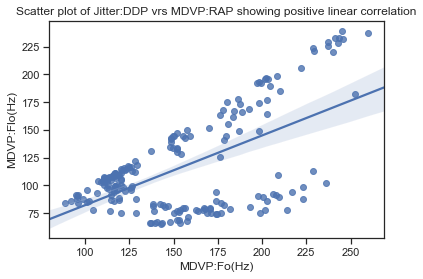

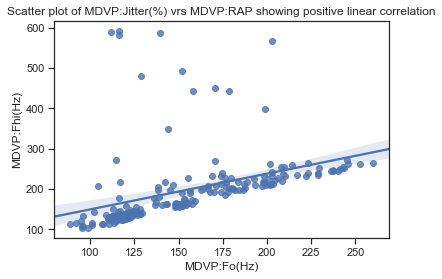

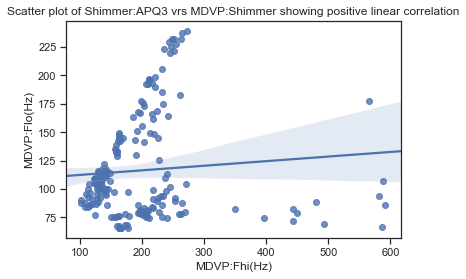

In [13]:
sns.regplot(y='MDVP:Flo(Hz)',x='MDVP:Fo(Hz)',data=pd_data)
plt.title("Scatter plot of Jitter:DDP vrs MDVP:RAP showing positive linear correlation")
plt.show()
sns.regplot(y='MDVP:Fhi(Hz)',x='MDVP:Fo(Hz)',data=pd_data)
plt.title("Scatter plot of MDVP:Jitter(%) vrs MDVP:RAP showing positive linear correlation")
plt.show()
sns.regplot(y='MDVP:Flo(Hz)',x='MDVP:Fhi(Hz)',data=pd_data)
plt.title("Scatter plot of Shimmer:APQ3 vrs MDVP:Shimmer showing positive linear correlation")
plt.show()

It is evident that features consisting of vocal fundamental frequencies such as MDVP:Fo(Hz), MDVP:Fhi(Hz) and MDVP:Flo(Hz) do not have notable correlations among themselves and negative corelation with features from the fundamental frequency perturbations as well as noise-to-harmonics ratio.
However, features with fundamental frequency perturbations and noise-to-harmonics ratio have high values for Pearson Correlation coefficient greater than 0.9. MDVP:RAP and MDVP:Jitter(%), Jitter:DDP and MDVP:RAP,  and Shimmer:APQ3 and MDVP:Shimmer are the most correlated features (pearson correlation coefficient > 0.987).

With the features having linear correlation existing among some of them, there is the need to 'decorrelates' them. This will reduce the dataset to its "bare bones", thereby discarding any nosiy feature and moreover will improve the perfromance of the model which will be built since the problem is a classification problem and noisy data would affect model training and subsequently model performance.

##### 3. What is number of features required to approximate the dataset well?

In [14]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(features_needed)
transformed_data = model.transform(features_needed)

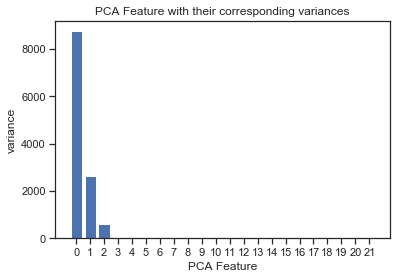

In [15]:
features = range(model.n_components_)
plt.bar(features,model.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel("PCA Feature")
plt.title("PCA Feature with their corresponding variances")
plt.show()

Intrinsic dimension determnines the number of features that a dataset requires to approximate it. Intrinsic dimension works on PCA through identifyng and counting the number of features with high variance.
The number of PCA features with significant varaince is 3 hence three features can be used to approximate the dataset.

##### 4. What is the most important feature (predictor) for the target variable?

In [16]:
#Import RandomForestRegressor from the sklearn.ensemble package
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#Scale the dataset
x_scaled = scale(features_needed)
y= pd_data['status']
#Split the data into training  and test data using the scaled data
Xx_train,Xx_test,yy_train,yy_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42,stratify=y)

#Instantiate an object of the RandomForestRegressor
rf = RandomForestRegressor()

#Fit the model on the training data
rf.fit(Xx_train,yy_train)

#Predict using the model on new data
y_predict = rf.predict(Xx_test)

C:\Users\Pateric\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


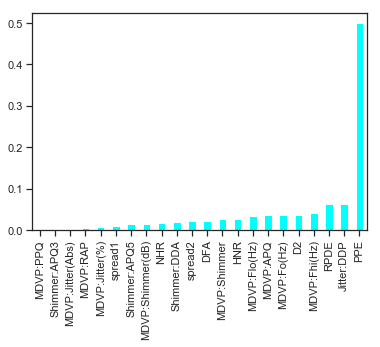

In [17]:
importances_rf = pd.Series(rf.feature_importances_,index=features_needed.columns)
sorted_importances = importances_rf.sort_values()
sorted_importances.plot(kind='bar',color='aqua')
plt.show()

[09:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.03477402 0.04427626 0.         0.02044878 0.         0.09447686
 0.0919856  0.         0.04996917 0.01386535 0.04232996 0.01785313
 0.01220573 0.         0.09761242 0.0628407  0.03239704 0.0235098
 0.07164624 0.05177113 0.         0.23803784]


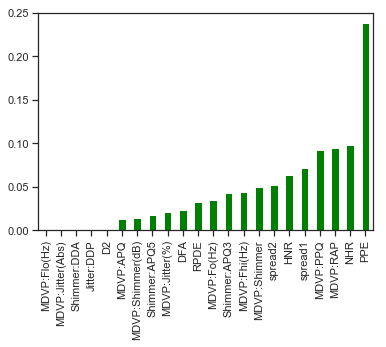

In [18]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimators=10)

xgb.fit(Xx_train,yy_train)
xgb_predict = xgb.predict(Xx_test)
print(xgb.feature_importances_)
importances_rf = pd.Series(xgb.feature_importances_,index=features_needed.columns)
sorted_importances = importances_rf.sort_values()
sorted_importances.plot(kind='bar',color='green')
plt.show()

From the above analysis, it can be concluded that the pitch period (PPE) is the most important feature among all the features used for predicting occurrence of Parkinson's disease in a subject of investigation. However, more research needs to be conducted especially with a large dataset. To sure consistent with two models were used in determing the mosi importance feature, XGBClassifier and RandomForestRegressor.

#### MODEL BUILDING 

In [19]:
#import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve

#Instantiate an object of LogisticRegression
logreg = LogisticRegression()

#Split the data into predictor (features) and target variables
X=pd_data.drop(['name','status'],axis=1).values
y=pd_data['status'].values

#Split the data into training  and test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42,stratify=y)

#Fit the model with the training data
logreg.fit(X_train,y_train)

#Predict the model using the test data 
prediction = logreg.predict_proba(X_test)[:,1]

#Compute the roc_auc score of the model higher value show better model
model_per_score = roc_auc_score(y_test,prediction)

#Print the model score on screen
print(model_per_score)

0.8621212121212121


C:\Users\Pateric\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
# Build another model using KNeighbours
#import the necessary package
from sklearn.neighbors import KNeighborsClassifier

#Instantiate an object of KNeighborsClassifier and setting the number of neighbours to 6
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(Xx_train,yy_train)

#Predict with the model
pred = knn.predict(Xx_test)

#Measure the model performance on the unseen data
score_knn = knn.score(Xx_test,yy_test)
print(score_knn)

0.8813559322033898


In [21]:
# Fitting the model on scaled training data

#Fit the model with the training data
logreg.fit(Xx_train,yy_train)

#Predict the model using the test data 
y_pred = logreg.predict_proba(Xx_test)[:,1]

#Compute the roc_auc score of the model higher value show better model
model_per_score_PCA = roc_auc_score(yy_test,y_pred)
print(model_per_score_PCA)

0.8818181818181818


C:\Users\Pateric\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Scaling the features produced a model performance of 0.882 (88%) as against 0.862 (86%) with an unscaled data. This re-enforce the need to scale dataset especially features on larger scale.

In [22]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score (logreg,x_scaled,y,cv=10)
print(np.mean(cv_result))

C:\Users\Pateric\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8217251461988304


C:\Users\Pateric\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pateric\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pateric\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pateric\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pateric\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

Moreover, cross validation model performance score for 10 folds output  0.822 (82%).